In [9]:
import dask.dataframe as dd
fp = "../../data/q2_2016_ticket_resolution_data.csv"
ddf = dd.read_csv(fp)


In [10]:
import pandas as pd
fpdtypes = "../../data/ticket_resolution_dtypes.csv"
dtypes_df = pd.read_csv(fpdtypes)
dtypes_dict = {row["attribute"]: row["type"] for index, row in dtypes_df.iterrows()}
ddf = ddf.astype(dtypes_dict)
ddf = ddf.reset_index()

In [11]:
ddf["resolution_time"] = ddf["closed_at"] - ddf["sys_created_at"]
ddf["resolution_time"] = ddf["resolution_time"].apply(lambda x: x.total_seconds()/3600,
                                                     meta=('resolution_time', 'float64'))

In [ ]:
ddf["resolution_time"].compute().describe()

count    3807.000000
mean      667.898941
std       866.835488
min         0.116667
25%       126.058333
50%       237.016667
75%       840.808333
max      4227.233333
Name: resolution_time, dtype: float64

In [ ]:
fp_q2_2016 = "../../data/plot_data_q2_2016_ticket_activity.csv"
ddf.to_csv(fp_q2_2016, index=False, mode="w+")
select_group_10_closing_activity = ddf["assignment_group"] == "Group 10"
ddf[select_group_10_closing_activity].compute()

,index,number,sys_created_at,closed_at,assignment_group,resolution_time
94,94,INC0000775,2016-01-03 15:14:00,2016-06-03 17:00:00,Group 10,3649.766667
115,115,INC0001149,2016-02-03 11:05:00,2016-05-16 17:07:00,Group 10,2478.033333
116,116,INC0001155,2016-02-03 11:09:00,2016-04-30 10:07:00,Group 10,2086.966667
117,117,INC0001162,2016-02-03 11:13:00,2016-05-25 16:07:00,Group 10,2692.900000
118,118,INC0001177,2016-02-03 11:22:00,2016-05-21 08:07:00,Group 10,2588.750000
...,...,...,...,...,...,...
3678,3678,INC0032970,2016-05-25 11:37:00,2016-05-30 12:07:00,Group 10,120.500000
3687,3687,INC0033021,2016-05-25 12:54:00,2016-05-30 15:07:00,Group 10,122.216667
3766,3766,INC0034263,2016-05-31 13:12:00,2016-06-06 10:07:00,Group 10,140.916667
3784,3784,INC0034352,2016-05-31 15:28:00,2016-06-06 14:07:00,Group 10,142.650000


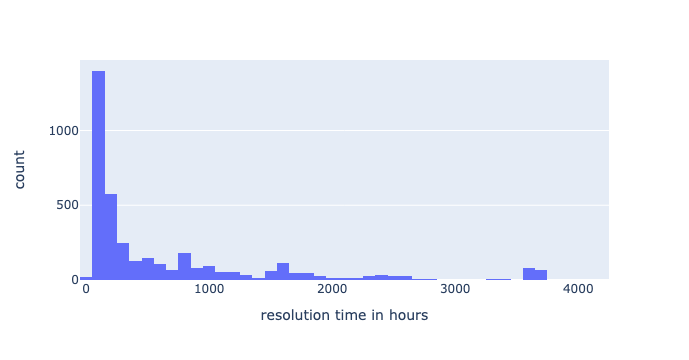

In [ ]:
import plotly.express as px
import numpy as np

fig = px.histogram(ddf.compute(), x="resolution_time", labels=dict(resolution_time="resolution time in hours"))
fig.show()

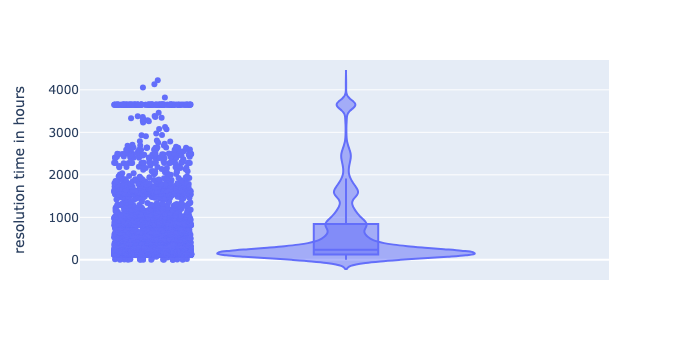

In [ ]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)
fig = px.violin(ddf.compute(), y="resolution_time",
                box=True, points="all",
                labels=dict(resolution_time="resolution time in hours"),
                hover_data=ddf.columns)
fig.show()

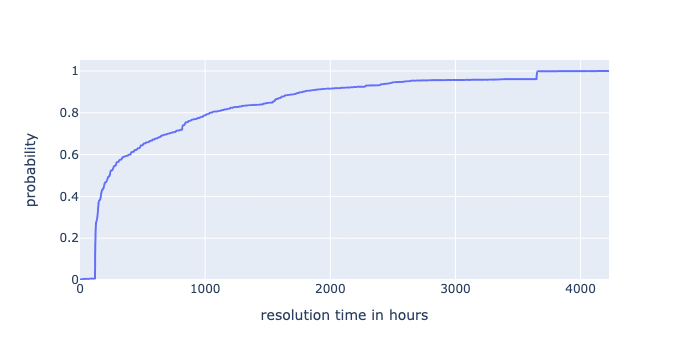

In [16]:
import plotly.express as px
fig = px.ecdf(ddf.compute(), x="resolution_time", labels=dict(resolution_time="resolution time in hours"))
fig.show()